In [39]:
# The easiest way to get ggplot2 is to install the whole tidyverse:
install.packages("tidyverse")
install.packages("dplyr")

Instalando pacote em 'C:/Users/Lucas bernardo/AppData/Local/R/win-library/4.4'
(como 'lib' não foi especificado)



pacote 'tidyverse' desempacotado com sucesso e somas MD5 verificadas

Os pacotes binários baixados estão em
	C:\Users\Lucas bernardo\AppData\Local\Temp\RtmpUXn67o\downloaded_packages


Warning message:
"o pacote 'dplyr' está em uso e não será instalado"


In [40]:
library(ggplot2)
library(dplyr)
library(ggplot2)

In [41]:
df_nba <- read.csv("../datasets/nba/nba_stats.csv", header = TRUE, sep = ",")
df_nba$salary <- as.double(gsub("[\\$,]", "", df_nba$salary))
df_nba$salary <- df_nba$salary / 1e6 
str(df_nba)

'data.frame':	8162 obs. of  55 variables:
 $ year                            : int  1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 ...
 $ name                            : chr  "Allen Iverson" "Allen Iverson" "Allen Iverson" "Allen Iverson" ...
 $ playerId                        : int  366 366 366 366 366 366 366 366 366 366 ...
 $ playerSlug                      : chr  "allen-iverson" "allen-iverson" "allen-iverson" "allen-iverson" ...
 $ positionId                      : chr  "SG" "SG" "SG" "SG" ...
 $ teamId                          : chr  "PHI" "PHI" "PHI" "PHI" ...
 $ status                          : chr  "inactive" "inactive" "inactive" "inactive" ...
 $ gamesPlayed                     : num  48 70 71 60 82 48 75 72 65 82 ...
 $ avgMinutes                      : num  41.5 40.8 42 43.7 42.5 ...
 $ avgFouls                        : num  2.04 2.31 2.07 1.7 1.82 ...
 $ flagrantFouls                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ technicalFouls                  : num  5 12 18

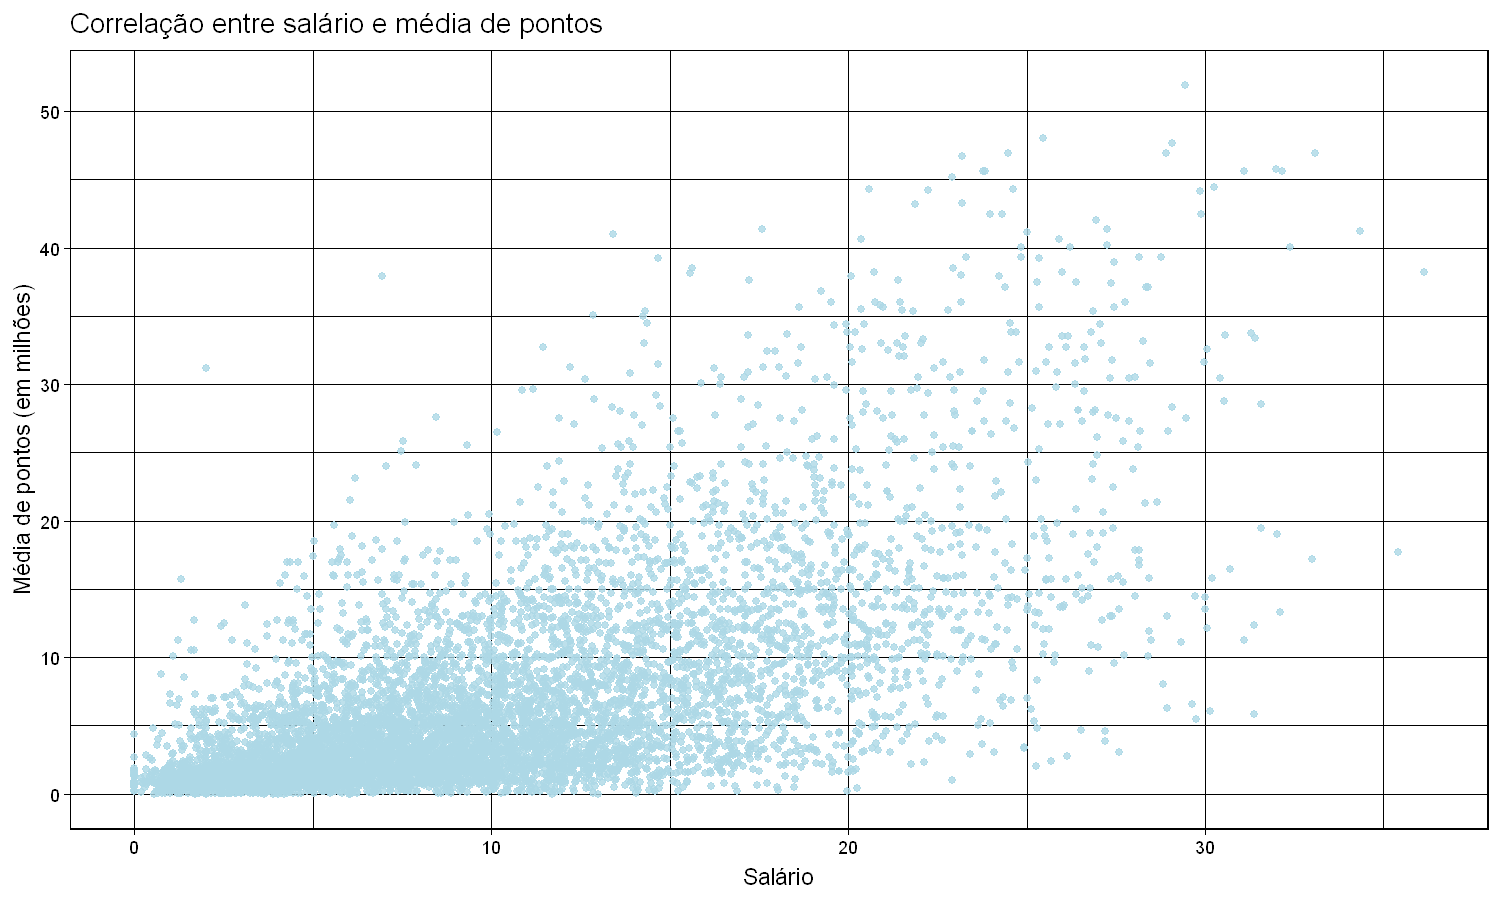

In [42]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 150)



ggplot(data = df_nba, mapping = aes(x = avgPoints, y = salary)) +
    geom_point(color = "lightblue", alpha = 0.8) +
    labs(
        title = "Correlação entre salário e média de pontos",
        x = "Salário",
        y = "Média de pontos (em milhões)",
       
    ) +
    theme_linedraw()

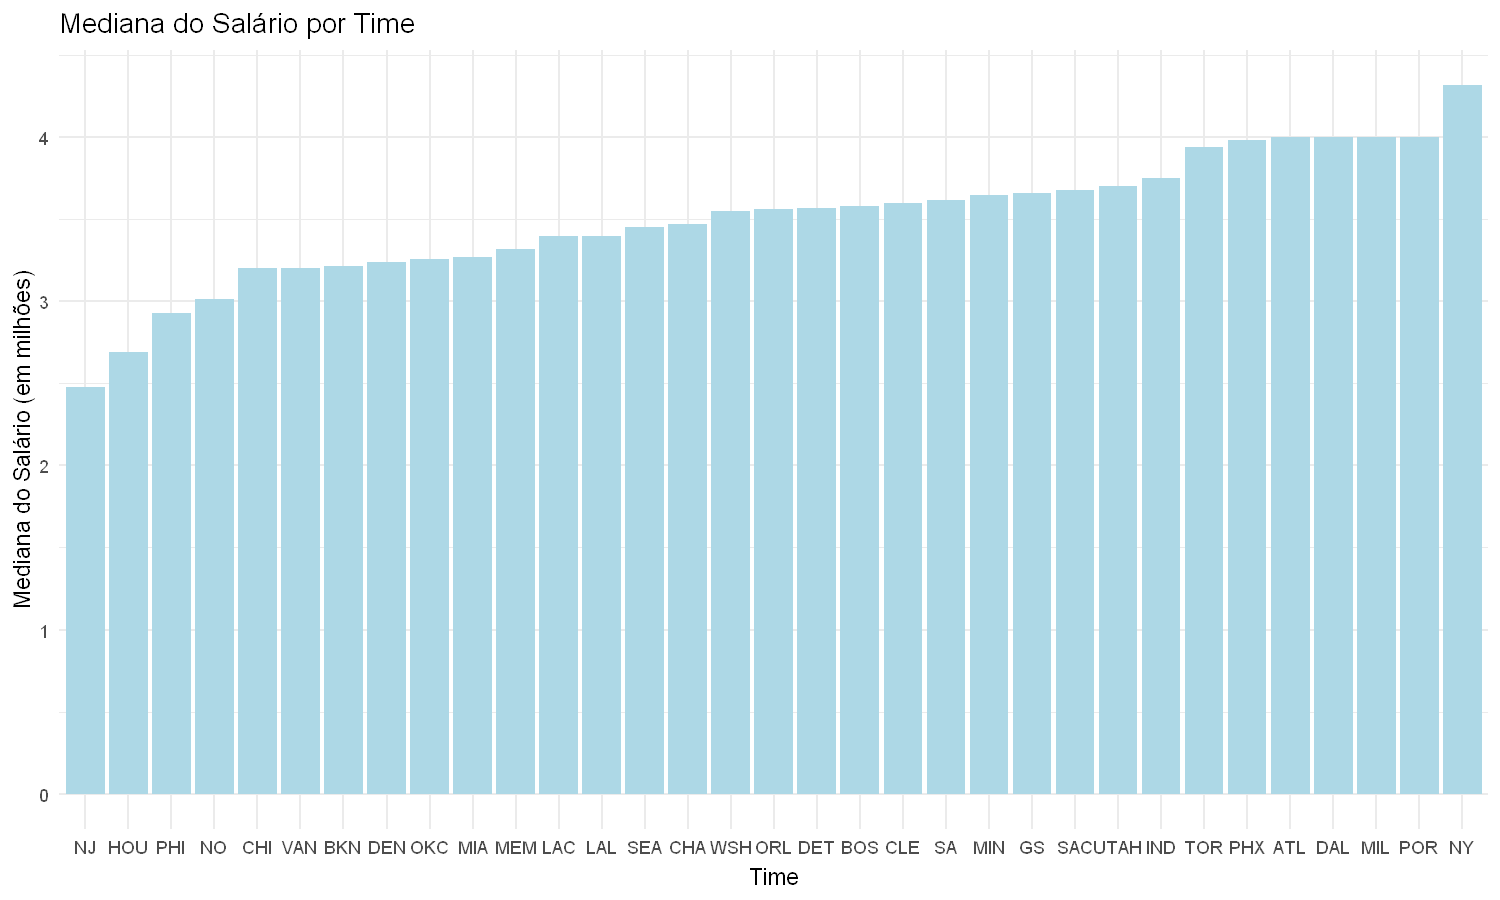

In [43]:
mediana_salario_por_time <- df_nba %>%
  group_by(teamId) %>%
  summarize(mediana_salario = median(salary, na.rm = TRUE)) %>%
  arrange(desc(mediana_salario))

ggplot(mediana_salario_por_time, aes(x = reorder(teamId, mediana_salario), y = mediana_salario)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(
    title = "Mediana do Salário por Time",
    x = "Time",
    y = "Mediana do Salário (em milhões)"
  ) +
  theme_minimal()

In [45]:
mediana_salario_por_posicao <- df_nba %>%
  filter(position != "Not Available")
  group_by(position) %>%
  summarize(mediana_salario = median(salary, na.rm = TRUE)) %>%
  arrange(desc(mediana_salario))

ggplot(mediana_salario_por_posicao, aes(x = reorder(position, mediana_salario), y = mediana_salario)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(
    title = "Mediana do Salário por Posição",
    x = "Posição",
    y = "Mediana do Salário (em milhões)"
  ) +
  theme_minimal()

ERROR: Error in eval(expr, envir, enclos): objeto 'position' não encontrado
